In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm



#### Uploading CO Dataset

In [2]:
CO=pd.read_excel('CO_master.xlsx')

In [3]:
CO.head()

,Date,Site ID,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_DESC,CBSA_NAME,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2015-01-01,510130020,0.9,ppm,10,19,79,Carbon monoxide,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922
1,2015-01-02,510130020,1.0,ppm,11,24,100,Carbon monoxide,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922
2,2015-01-03,510130020,1.3,ppm,15,24,100,Carbon monoxide,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922
3,2015-01-04,510130020,0.6,ppm,7,24,100,Carbon monoxide,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922
4,2015-01-05,510130020,0.3,ppm,3,24,100,Carbon monoxide,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Arlington,38.8577,-77.05922


#### Checking for duplicates and unnecessary whitespaces

In [4]:
CO.columns=CO.columns.str.strip()

In [5]:
CO[CO.duplicated()]

,Date,Site ID,Daily Max 8-hour CO Concentration,UNITS,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_DESC,CBSA_NAME,COUNTY,SITE_LATITUDE,SITE_LONGITUDE


#### Checking for null values

In [6]:
print('Number of instances = %d\nNumber of attributes = %d' % (CO.shape[0], CO.shape[1]))
print('------------------------------')
CO.isnull().sum()

Number of instances = 14586
Number of attributes = 12
------------------------------


Date                                 0
Site ID                              0
Daily Max 8-hour CO Concentration    0
UNITS                                0
DAILY_AQI_VALUE                      0
DAILY_OBS_COUNT                      0
PERCENT_COMPLETE                     0
AQS_PARAMETER_DESC                   0
CBSA_NAME                            0
COUNTY                               0
SITE_LATITUDE                        0
SITE_LONGITUDE                       0
dtype: int64

#### Checking for missing values/records

In [7]:
CO[['Date','COUNTY','DAILY_AQI_VALUE']].groupby('COUNTY').count()

,Date,DAILY_AQI_VALUE
COUNTY,,
Alexandria City,397,397
Arlington,2135,2135
Fairfax,1664,1664
Hampton City,2030,2030
Henrico,2064,2064
Norfolk City,2030,2030
Richmond City,2121,2121
Roanoke,2145,2145


Dropping Alexandria County

In [8]:
CO=CO.drop(CO[CO.COUNTY=='Alexandria City'].index)

Checking by year

In [9]:
CO[['DAILY_AQI_VALUE']].groupby(CO.Date.dt.year).count()

,DAILY_AQI_VALUE
Date,
2015,2135
2016,2265
2017,2423
2018,2472
2019,2463
2020,2431


2015 to 2016

In [10]:
for i in CO.COUNTY.unique():
  missed=pd.date_range('2015-01-01','2016-12-31' ).difference(CO[CO.COUNTY==i].Date)
  print('Dates missing in ' + i + ' are:',len(missed))

Dates missing in Arlington are: 28
Dates missing in Henrico are: 44
Dates missing in Roanoke are: 16
Dates missing in Hampton City are: 39
Dates missing in Norfolk City are: 87
Dates missing in Richmond City are: 23
Dates missing in Fairfax are: 480


2017 - 2019

In [11]:
for i in CO.COUNTY.unique():
  missed=pd.date_range('2017-01-01','2019-12-31' ).difference(CO[CO.COUNTY==i].Date)
  print('Dates missing in ' + i + ' are:',len(missed))

Dates missing in Arlington are: 29
Dates missing in Henrico are: 63
Dates missing in Roanoke are: 24
Dates missing in Hampton City are: 48
Dates missing in Norfolk City are: 63
Dates missing in Richmond City are: 32
Dates missing in Fairfax are: 48


2015 and 2016 significantly have more missing data

Fairfax has almost no data recorded prior to 2017,Norfolk is missing about 11 percent of data between 2015 to 2016

Dropping 2015 and 2016

In [12]:
CO=CO.drop(CO[CO.Date.dt.year == 2015].index)
CO=CO.drop(CO[CO.Date.dt.year == 2016].index)

Checking for 2020

In [13]:
for i in CO.COUNTY.unique():
  missed=pd.date_range('2020-01-01','2020-12-31' ).difference(CO[CO.COUNTY==i].Date)
  print('Dates missing in ' + i + ' are:',len(missed))

Dates missing in Arlington are: 0
Dates missing in Fairfax are: 0
Dates missing in Henrico are: 21
Dates missing in Roanoke are: 7
Dates missing in Hampton City are: 75
Dates missing in Norfolk City are: 12
Dates missing in Richmond City are: 16


Need to check Hampton since 2020 is the year of interest

In [14]:
pd.date_range('2017-01-01','2019-12-31' ).difference(CO[CO.COUNTY=='Hampton City'].Date)

DatetimeIndex(['2017-02-07', '2017-08-01', '2018-03-19', '2018-03-20',
               '2018-05-20', '2018-05-21', '2018-05-22', '2018-06-12',
               '2018-06-13', '2018-06-14', '2018-06-15', '2018-06-16',
               '2018-06-17', '2018-06-18', '2018-06-19', '2018-06-20',
               '2018-06-21', '2018-06-22', '2018-06-23', '2018-06-24',
               '2018-06-25', '2018-06-26', '2018-06-29', '2018-06-30',
               '2018-07-01', '2018-07-02', '2018-07-29', '2018-07-30',
               '2018-07-31', '2019-01-19', '2019-01-20', '2019-01-21',
               '2019-01-22', '2019-01-23', '2019-07-07', '2019-12-06',
               '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10',
               '2019-12-11', '2019-12-12', '2019-12-13', '2019-12-14',
               '2019-12-15', '2019-12-16', '2019-12-17', '2019-12-18'],
              dtype='datetime64[ns]', freq=None)

In [15]:
pd.date_range('2020-01-01','2020-12-31' ).difference(CO[CO.COUNTY=='Hampton City'].Date)

DatetimeIndex(['2020-01-26', '2020-01-27', '2020-02-10', '2020-02-11',
               '2020-03-08', '2020-07-07', '2020-07-08', '2020-07-09',
               '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13',
               '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27', '2020-07-28', '2020-07-29',
               '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02',
               '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06',
               '2020-08-07', '2020-08-08', '2020-08-09', '2020-08-10',
               '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
               '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18',
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24', '2020-09-13', '2020-09-14',
      

missing majority of data from July - Oct for year 2020 . Since study is about lockdown period, we can keep 1st six months of data.

In [16]:
for i in range (7,13):
 CO=CO.drop(CO[CO.Date.dt.month == i].index)


In [17]:
CO[['Date','COUNTY']].groupby('COUNTY').count()

,Date
COUNTY,
Arlington,698
Fairfax,699
Hampton City,692
Henrico,693
Norfolk City,702
Richmond City,696
Roanoke,715


approximately 720 dates(4 * 181) must be there per County.We have atleast more than 96% of monitored data for each county

#### Mean AQI value for 2017-2019

In [18]:
CO3=CO[CO.Date.dt.year <= 2019][['DAILY_AQI_VALUE']].groupby([CO.Date.dt.month_name(),CO.COUNTY],sort=False).mean().unstack()
display(CO3)
CO3=CO3.reset_index()

DAILY_AQI_VALUE                                             \
COUNTY         Arlington   Fairfax   Henrico   Roanoke Hampton City   
Date                                                                  
January         4.336957  5.702381  3.963855  3.053763     3.261364   
February        4.726027  6.000000  4.100000  3.000000     2.915663   
March           4.063291  5.064516  3.193182  2.539326     2.439560   
April           3.438202  4.941176  2.844444  2.544444     2.100000   
May             3.774194  5.265060  2.428571  2.736264     1.811111   
June            3.555556  5.213483  2.556818  3.034884     1.712329   

                                     
COUNTY   Norfolk City Richmond City  
Date                                 
January      4.845238      5.279570  
February     4.072289      5.583333  
March        3.978495      3.838710  
April        2.837500      3.461538  
May          3.130435      3.336957  
June         3.022727      3.111111

#### Mean AQI value for 2020

In [19]:
CO4=CO[CO.Date.dt.year == 2020][['DAILY_AQI_VALUE']].groupby([CO.Date.dt.month_name(),CO.COUNTY],sort=False).mean().unstack()
display(CO4)
CO4=CO4.reset_index()

DAILY_AQI_VALUE                                             \
COUNTY         Arlington   Fairfax   Henrico   Roanoke Hampton City   
Date                                                                  
January         4.580645  5.000000  3.833333  2.354839     1.931034   
February        4.620690  5.689655  3.833333  2.758621     4.629630   
March           3.451613  4.225806  2.413793  1.677419     4.700000   
April           2.800000  3.366667  2.482759  1.566667     1.100000   
May             2.612903  3.935484  2.129032  1.870968     2.612903   
June            2.666667  4.766667  2.033333  2.233333     2.333333   

                                     
COUNTY   Norfolk City Richmond City  
Date                                 
January      5.000000      4.450000  
February     4.551724      6.791667  
March        3.419355      6.096774  
April        1.733333      3.633333  
May          2.967742      2.838710  
June         3.566667      2.866667

#### Plotting Line Graph for both mean tables

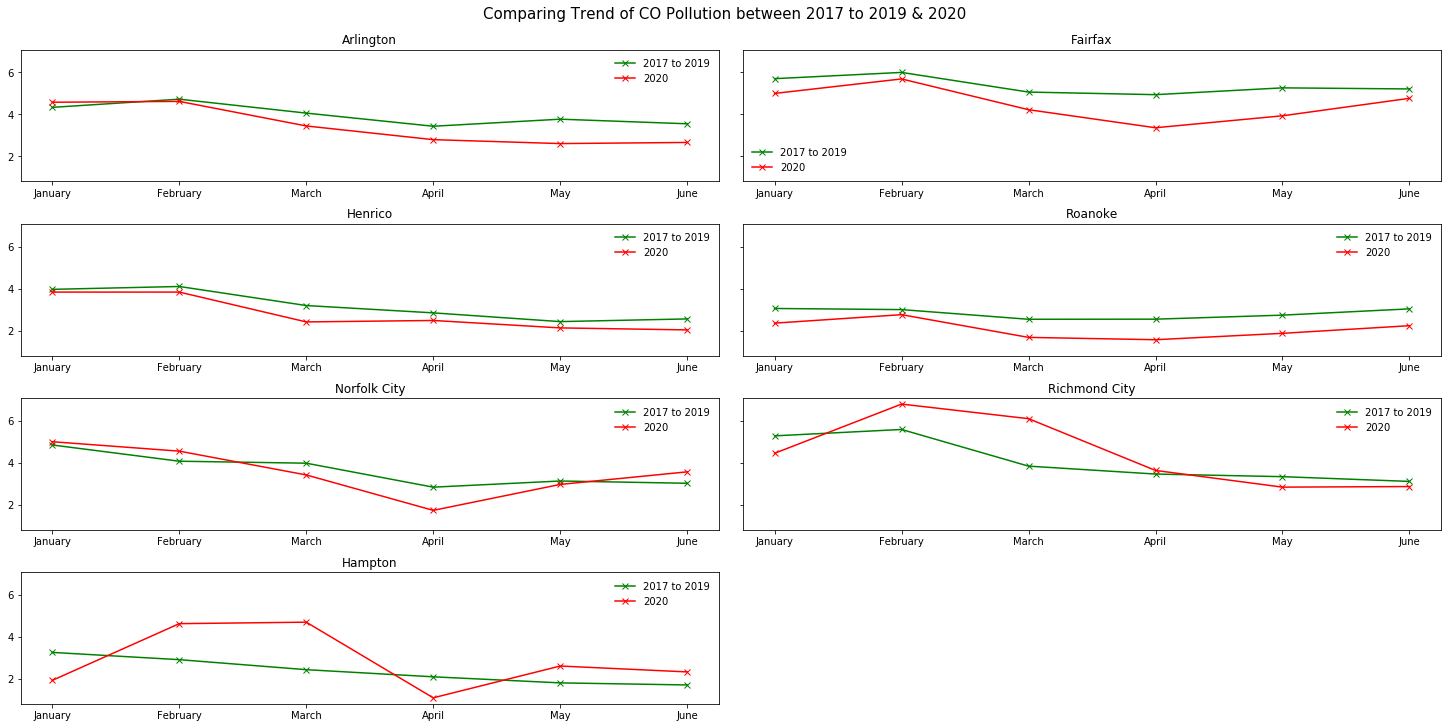

In [20]:
fig, ((ax1, ax2), (ax3,ax4), (ax5,ax6), (ax7,ax8)) = plt.subplots(4, 2, figsize=(20, 10), constrained_layout=True,sharey='all')
fig.delaxes(ax8)
fig.suptitle('Comparing Trend of CO Pollution between 2017 to 2019 & 2020', size=15)
#For Years 2017 - 2019
# Arlington
ax1.plot(CO3.Date,CO3.DAILY_AQI_VALUE.Arlington,  c='g',marker='x',label='2017 to 2019')
ax1.title.set_text('Arlington')

# Fairfax
ax2.plot(CO3.Date,CO3.DAILY_AQI_VALUE.Fairfax,  c='g',marker='x',label='2017 to 2019' )
ax2.title.set_text('Fairfax')

# Henrico
ax3.plot(CO3.Date,CO3.DAILY_AQI_VALUE.Henrico,  c='g',marker='x',label='2017 to 2019')
ax3.title.set_text('Henrico')

# Roanoke
ax4.plot(CO3.Date,CO3.DAILY_AQI_VALUE.Roanoke, c='g',marker='x',label='2017 to 2019')
ax4.title.set_text('Roanoke')

# Norfolk City
ax5.plot(CO3.Date,CO3.DAILY_AQI_VALUE['Norfolk City'], c='g',marker='x',label='2017 to 2019')
ax5.title.set_text('Norfolk City')

# Richmond City
ax6.plot(CO3.Date,CO3.DAILY_AQI_VALUE['Richmond City'], c='g',marker='x',label='2017 to 2019')
ax6.title.set_text('Richmond City')

# Hampton 
ax7.plot(CO3.Date,CO3.DAILY_AQI_VALUE['Hampton City'], c='g',marker='x',label='2017 to 2019')
ax7.title.set_text('Hampton')


#For Year 2020
# Arlington
ax1.plot(CO4.Date,CO4.DAILY_AQI_VALUE.Arlington,  c='r',marker='x',label='2020')


# Fairfax
ax2.plot(CO4.Date,CO4.DAILY_AQI_VALUE.Fairfax,  c='r',marker='x',label='2020')


# Henrico
ax3.plot(CO4.Date,CO4.DAILY_AQI_VALUE.Henrico,  c='r',marker='x',label='2020')


# Roanoke
ax4.plot(CO4.Date,CO4.DAILY_AQI_VALUE.Roanoke, c='r',marker='x',label='2020')


# Norfolk City
ax5.plot(CO4.Date,CO4.DAILY_AQI_VALUE['Norfolk City'], c='r',marker='x',label='2020')


# Richmond City
ax6.plot(CO4.Date,CO4.DAILY_AQI_VALUE['Richmond City'], c='r',marker='x',label='2020')

# Hampton
ax7.plot(CO4.Date,CO4.DAILY_AQI_VALUE['Hampton City'], c='r',marker='x',label='2020')

ax=(ax1,ax3,ax4,ax5,ax6,ax7)
for i in ax:
 i.legend(frameon=False,loc='upper right')

ax2.legend(frameon=False,loc='lower left')


plt.show()

#### Calculating variation between baseline(2017-2019) and year of interest(2020)
##### Note:This is only a base64 encoded image embedded as Markdown for referential purpose. Proper citations has been given in Final Report.  

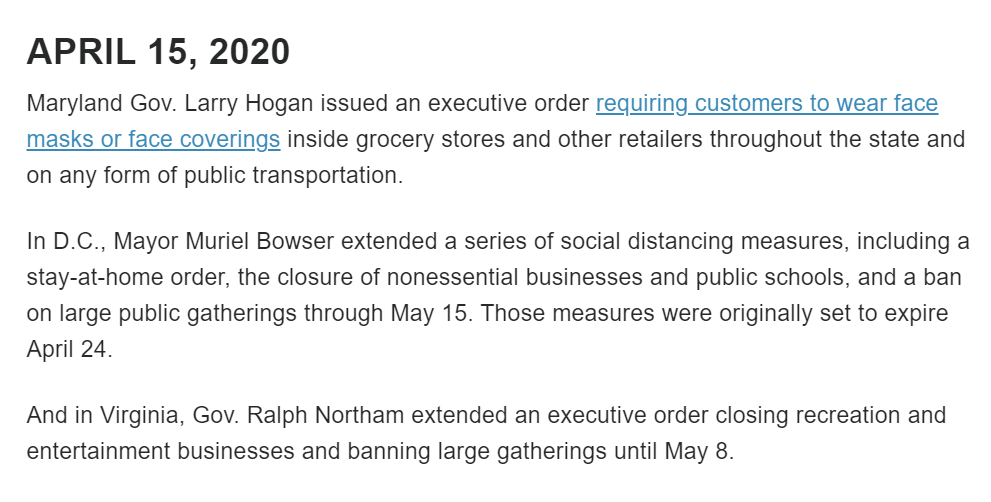

#### So we've considered just April and May(prime lockdown period) in the below process for deriving the geomap data.

##### Mean value for years between 2019 and 2017

In [21]:
Baseline=CO[(CO.Date.dt.year <= 2019) & ((CO.Date.dt.month==4) | (CO.Date.dt.month==5)) ][['DAILY_AQI_VALUE']].groupby([CO.Date.dt.month_name(),CO.COUNTY],sort=False).mean().unstack()
Baseline

DAILY_AQI_VALUE                                             \
COUNTY       Arlington   Fairfax   Henrico   Roanoke Hampton City   
Date                                                                
April         3.438202  4.941176  2.844444  2.544444     2.100000   
May           3.774194  5.265060  2.428571  2.736264     1.811111   

                                   
COUNTY Norfolk City Richmond City  
Date                               
April      2.837500      3.461538  
May        3.130435      3.336957

##### Mean value for 2020

In [22]:
Lockdown=CO[(CO.Date.dt.year == 2020) & ((CO.Date.dt.month==4) | (CO.Date.dt.month==5)) ][['DAILY_AQI_VALUE']].groupby([CO.Date.dt.month_name(),CO.COUNTY],sort=False).mean().unstack()
Lockdown

DAILY_AQI_VALUE                                             \
COUNTY       Arlington   Fairfax   Henrico   Roanoke Hampton City   
Date                                                                
April         2.800000  3.366667  2.482759  1.566667     1.100000   
May           2.612903  3.935484  2.129032  1.870968     2.612903   

                                   
COUNTY Norfolk City Richmond City  
Date                               
April      1.733333      3.633333  
May        2.967742      2.838710

##### Mean Difference

In [23]:
Impact=Lockdown-Baseline
Impact

DAILY_AQI_VALUE                                             \
COUNTY       Arlington   Fairfax   Henrico   Roanoke Hampton City   
Date                                                                
April        -0.638202 -1.574510 -0.361686 -0.977778    -1.000000   
May          -1.161290 -1.329576 -0.299539 -0.865296     0.801792   

                                   
COUNTY Norfolk City Richmond City  
Date                               
April     -1.104167      0.171795  
May       -0.162693     -0.498247

In [24]:
Impact.mean().round(2).sort_values()

                 COUNTY       
DAILY_AQI_VALUE  Fairfax         -1.45
                 Roanoke         -0.92
                 Arlington       -0.90
                 Norfolk City    -0.63
                 Henrico         -0.33
                 Richmond City   -0.16
                 Hampton City    -0.10
dtype: float64

#### Below is the geo map generated using Paintmaps - an online map generating tool plotted by values from above Impact table. 
##### Note:This is only a base64 encoded image embedded as Markdown for referential purpose. Proper citation has been given in Final Report.

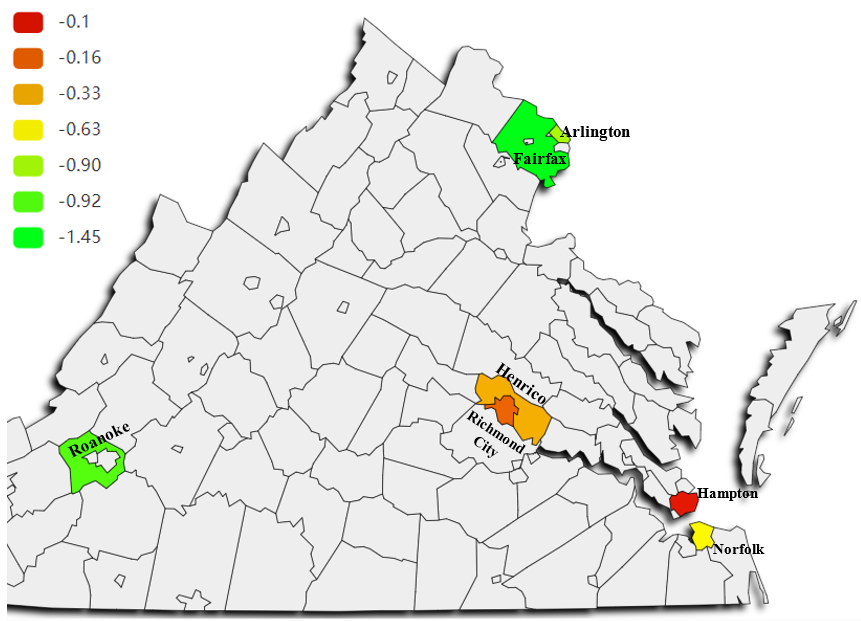